# 光學文字辨識

## 下載示範圖片

In [ ]:
!wget https://wumanzoo.com/wp-content/uploads/2023/10/%E8%BE%B0%E5%AE%87%E8%90%BD%E9%9B%81%E9%AB%94@1.5x-50-1024x341.jpg

## EasyOCR

速度較慢，魯棒性好

In [ ]:
!pip3 install easyocr

In [8]:
import easyocr
reader = easyocr.Reader(['ch_tra','en']) # this needs to run only once to load the model into memory
result = reader.readtext('/content/辰宇落雁體@1.5x-50-1024x341.jpg')
result

[([[146, 49], [875, 49], [875, 140], [146, 140]],
  't"道戎魯可免6}志記',
  0.00021493765026855727),
 ([[211, 147], [810, 147], [810, 226], [211, 226]],
  '2布望+a遠箇曾去',
  0.0016541348203436856),
 ([[223, 277], [411, 277], [411, 313], [223, 313]],
  '那我懂你意思了',
  0.9746705990643261),
 ([[432, 278], [642, 278], [642, 310], [432, 310]],
  '(我打工的咖啡廳)',
  0.7872202911979848),
 ([[663, 277], [801, 277], [801, 313], [663, 313]],
  '辰宇落雁體',
  0.9877814263883424)]

## Tesseract OCR

此ocr需要先安裝Tesseract核心  
再安裝pytesseract，才能透過python調用Tesseract進行ocr
* 字太小,亮度不均,文字歪斜都會讓Tesseract效果降低，需要先進行預處理

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-chi-tra
!pip install pytesseract

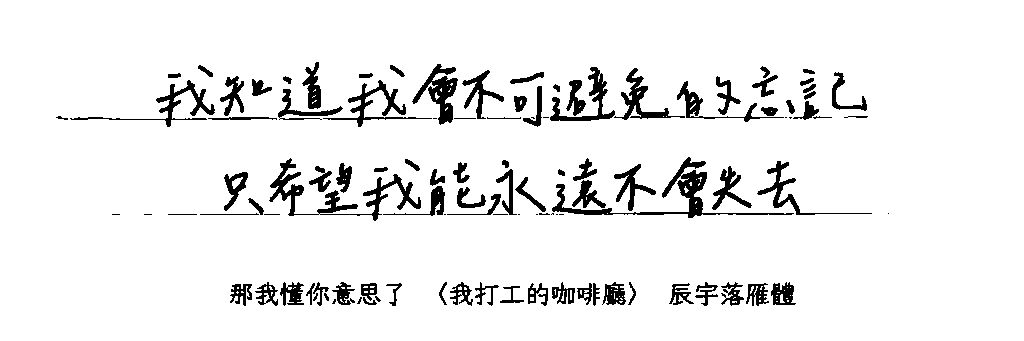

一 _y香望我人,  不人

那我懂你意思了 〈我打工的咖啡廳) 辰宇落雁體



In [11]:
import pytesseract
from PIL import Image, ImageFilter
import os
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
def binarize_image(image_path, threshold=196):
    # 讀取圖像
    #image = Image.open(image_path).convert('L')  # 轉換為灰度圖像
    image = image_path
    # 應用二值化
    binary_image = image.point(lambda p: 255 if p > threshold else 0)
    cv2_imshow(np.array(binary_image))
    return binary_image

os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'
img = Image.open('/content/辰宇落雁體@1.5x-50-1024x341.jpg').convert('L')
result = pytesseract.image_to_string(binarize_image(img),lang='chi_tra')
print(result)